In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
file_path = "C:/Users/LG/Desktop/customer_churn_dataset-testing-master.csv"

In [3]:
data = pd.read_csv(file_path)
print(data.head())
print(data.describe())
print(data.info())
print("결측치 개수:\n", data.isnull().sum())

   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0  
  

In [22]:
X = data.drop(columns='Churn') 
y = data['Churn'] 


In [23]:
X

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,22,Female,25,14,4,27,Basic,Monthly,598,9
1,41,Female,28,28,7,13,Standard,Monthly,584,20
2,47,Male,27,10,2,29,Premium,Annual,757,21
3,35,Male,9,12,5,17,Premium,Quarterly,232,18
4,53,Female,58,24,9,2,Standard,Annual,533,18
...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,33,12,6,21,Basic,Quarterly,947,14
64370,37,Male,6,1,5,22,Standard,Annual,923,9
64371,25,Male,39,14,8,30,Premium,Monthly,327,20
64372,50,Female,18,19,7,22,Standard,Monthly,540,13


In [29]:
from sklearn.preprocessing import StandardScaler
X_num = X.drop(columns=['Gender', 'Subscription Type', 'Contract Length'])

In [32]:
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler로 데이터 스케일링
sdscaler = StandardScaler()
scaled_data = sdscaler.fit_transform(X_num)


In [45]:
# One-Hot Encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [46]:
from sklearn.linear_model import LogisticRegression


In [47]:
# 데이터 스케일링 및 모델 학습
scaler = StandardScaler()
X_train_scaled = sdscaler.fit_transform(X_train)
X_test_scaled = sdscaler.transform(X_test)

In [48]:
# 모델 학습
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test_scaled)


In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 수치형 변수만 선택
X_num = X_train.select_dtypes(include=[np.number])

# 범주형 변수만 선택
X_cate = X_train.select_dtypes(exclude=[np.number])

# 수치형 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_num)

# 스케일링된 데이터를 DataFrame으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=X_num.columns)

# 범주형 데이터와 스케일링된 수치형 데이터를 합치기
X_dt = pd.concat([scaled_df, X_cate.reset_index(drop=True)], axis=1)

# 결과 확인
X_dt.head(10)




,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,1.007489,0.586916,-0.461726,-1.733835,-0.805979,0.968288,-0.057826,-0.934617,1.417888,-0.707560,-0.726372,1.455768
1,0.864009,1.639129,-1.142305,-0.770040,-0.918834,0.266576,0.984556,1.069957,-0.705275,1.413308,-0.726372,1.455768
2,-0.786001,-1.166770,-1.482595,1.157549,-1.144543,-1.221206,1.679478,1.069957,-0.705275,-0.707560,-0.726372,-0.686923
3,-0.642522,-0.582208,0.218853,-0.127510,0.886844,0.412287,0.521275,-0.934617,1.417888,-0.707560,1.376705,-0.686923
4,-0.212084,-0.231471,1.693442,-1.091305,0.886844,1.696841,0.752916,-0.934617,1.417888,-0.707560,1.376705,-0.686923
5,-1.288178,-0.932945,-0.688586,-1.412570,1.451118,0.588674,0.752916,-0.934617,-0.705275,-0.707560,1.376705,-0.686923
6,0.074874,1.522216,-0.915445,-1.733835,0.661134,-1.025647,-0.752747,-0.934617,-0.705275,1.413308,-0.726372,1.455768
7,0.003134,1.054566,0.559143,-0.770040,-0.467414,1.670000,-1.331848,1.069957,-0.705275,1.413308,-0.726372,1.455768
8,0.864009,-0.991402,1.126293,-0.448775,-0.467414,1.547296,0.637096,-0.934617,-0.705275,-0.707560,-0.726372,1.455768
9,-1.718616,-0.173014,-0.915445,0.515020,-1.708818,-0.369949,-0.521107,-0.934617,1.417888,-0.707560,-0.726372,-0.686923


In [56]:
from sklearn.metrics import accuracy_score, classification_report

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도: {accuracy}")

# 더 자세한 분류 보고서 출력
print(classification_report(y_test, y_pred))


정확도: 0.8316893203883495
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      6793
           1       0.82      0.83      0.82      6082

    accuracy                           0.83     12875
   macro avg       0.83      0.83      0.83     12875
weighted avg       0.83      0.83      0.83     12875



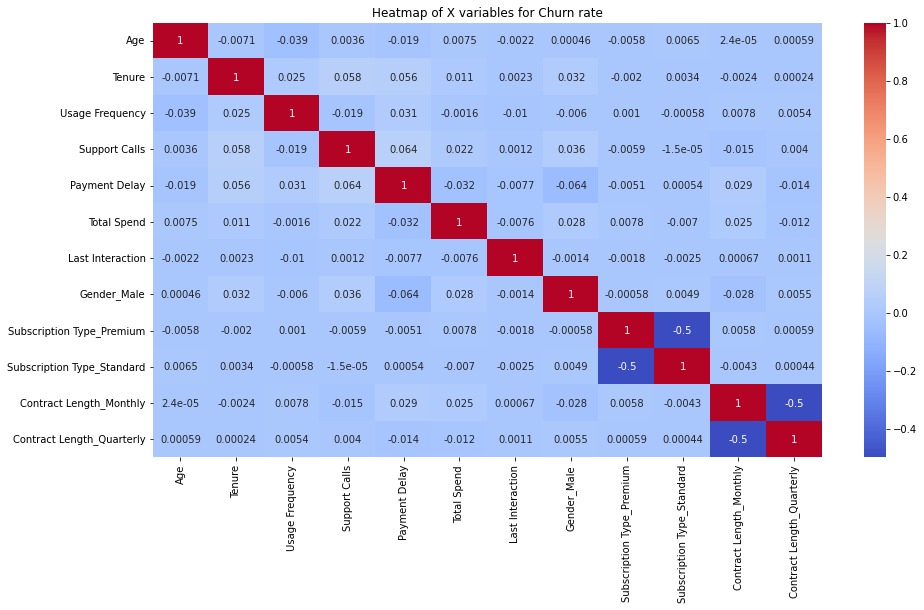

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵 그리기
plt.figure(figsize=(15, 8))
sns.heatmap(X_dt.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of X variables for Churn rate')
plt.show()
  

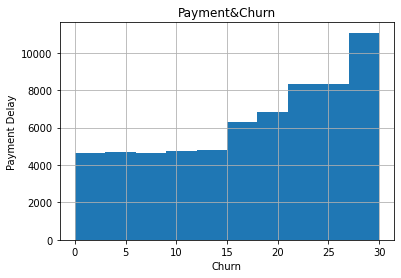

In [69]:
data['Payment Delay'].hist(bins=10)
plt.xlabel('Churn')
plt.ylabel('Payment Delay')
plt.title('Payment&Churn')
plt.show()


In [72]:
X = data[['Tenure', 'Total Spend']]
y = data['Churn']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

In [75]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [77]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In [78]:
print(f"모델 정확도: {accuracy * 100:.2f}%")

모델 정확도: 58.97%
